In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from mplsoccer import Pitch

pd.set_option('display.max_columns', None)

/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# CL Final
match_id = 18768058

# Load wyscout event data - Coordinates are transformed to opta
df_events = pd.read_parquet(f"Data/{match_id}_stories.parquet")

# files _stories same as _events so we use _events

In [3]:
df_events

,id,player_id,team_id,minute,second,period,start_x,start_y,end_x,end_y,cutback,switch,successful,video_start,possession_team_id,possession_id,time_diff,pass_accurate,shot_xg,shot_xgot,pass_length,possession_duration,first_event,event_index,possession_events,type,shot_goal,shot_body_part,shot_on_target,shot_on_post,shot_off_target,shot_blocked,pass_high,pass_low,pass_blocked,pass_recipient_id,possession_xg,possession_goal,player_position,xA,xT_start,xT_end,take_on,stopped_progress,recovered_possession,retain_possession,kept_possession,progressed_with_ball,aerial_won,match_state,team_win_state,possession_state,xg_after_5s,shot_id,pass,back_pass,short_or_medium_pass,forward_pass,loss,pass_to_final_third,progressive_pass,recovery,smart_pass,offside,free_kick,lateral_pass,acceleration,progressive_run,carry,cross,pass_to_penalty_area,interception,game_interruption,ball_out,corner,head_pass,shot,head_shot,opportunity,shot_after_corner,touch_in_box,goal_kick,long_pass,under_pressure,duel,aerial_duel,defensive_duel,ground_duel,offensive_duel,touch,throw_in,loose_ball_duel,counterpressing_recovery,clearance,foul_suffered,infraction,foul,shot_after_throw_in,shot_against,save,sliding_tackle,free_kick_cross,save_with_reflex,deep_completion,dribble,hand_pass,through_pass,dribbled_past_attempt,goalkeeper_exit,shot_assist,yellow_card,linkup_play,cross_blocked,deep_completed_cross,shot_block,second_assist,assist,key_pass,goal,conceded_goal,third_assist,fairplay,whistle,free_kick_shot,shot_after_free_kick,own_goal,penalty_foul,penalty,penalty_goal,penalty_conceded_goal,red_card,penalty_save,possession_set_piece_attack,possession_attack,possession_free_kick,possession_corner,possession_throw_in,possession_transition_low,possession_free_kick_cross,possession_transition_high,possession_transition_medium,possession_counterattack,possession_direct_free_kick,possession_penalty,match_time,approx_match_time,season,match_id,competition,possession_team
82,1670470694,11051,1625,4,51,1,76,80,70,69,False,False,True,292.816772,1625,1670470679,1.328,True,0.0000,0.0000,10,39.868015,False,11,21,pass,False,,False,False,False,False,False,False,False,14808,0.0615,False,LW,0.0000,0.0273,0.0227,False,None,None,NaN,None,None,False,0,-1,attack,0.0000,0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,291,286650.0,2022,5345058,108,home_team
83,1670470696,14808,1625,4,52,1,70,69,78,55,False,False,True,293.830383,1625,1670470679,1.014,False,0.0000,0.0000,0,39.868015,False,12,21,touch,False,,False,False,False,False,False,False,False,0,0.0615,False,LCMF3,0.0000,0.0227,0.0386,False,None,None,NaN,None,None,False,0,-1,attack,0.0000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,292,287664.0,2022,5345058,108,home_team
84,1670470697,14808,1625,4,54,1,78,55,78,43,False,False,True,295.614105,1625,1670470679,1.784,True,0.0000,0.0000,8,39.868015,False,13,21,pass,False,,False,False,False,False,False,False,False,9380,0.0615,False,LCMF3,0.0000,0.0285,0.0400,False,None,None,NaN,None,None,False,0,-1,attack,0.0000,0,True,False,True

In [4]:
df_events['possession_id'].value_counts()

possession_id
1670470679    10
1670470110    10
1670471109    10
1670471731    10
1670470278     9
1670471751     9
1670471559     8
1670471163     7
1670471161     6
1670471489     5
1670470159     4
1670471258     1
Name: count, dtype: int64

# Explore runs dataset

In [5]:
df_runs = pd.read_parquet(f"Data/{match_id}_runs.parquet")


In [6]:
df_runs.columns

Index(['player_id', 'jersey', 'team', 'frame_start', 'frame_end', 'start_x',
       'start_y', 'end_x', 'end_y', 'max_speed', 'avg_speed', 'player',
       'period', 'time_start', 'time_end', 'team_name', 'attacking_right',
       'wy_player_id', 'team_id', 'approx_time_start', 'approx_time_end',
       'Forward runs', 'Distance', 'Runs into box', 'xGRun',
       'In possession runs', 'possession_id', 'Target'],
      dtype='object')

In [7]:
df_runs.describe()

,jersey,frame_start,frame_end,start_x,start_y,end_x,end_y,max_speed,avg_speed,period,wy_player_id,team_id,approx_time_start,approx_time_end,Distance,xGRun,possession_id
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,8.050000e+02,8.050000e+02,805.000000,805.000000,8.050000e+02
mean,23.202484,34003.561491,34069.273292,49.480691,49.160281,49.560563,49.252051,24.264797,19.886949,1.527950,200543.351553,2376.781366,1.276249e+06,1.271887e+06,16.499434,0.003408,1.394480e+09
std,23.151566,20699.605790,20698.049991,18.277529,24.124698,24.534041,25.715977,3.258530,0.197683,0.499529,156758.392844,768.306085,8.029683e+05,8.017840e+05,9.469673,0.024988,6.207595e+08
min,2.000000,81.000000,106.000000,3.168120,0.000000,0.117792,0.000000,19.939345,19.800044,1.000000,7905.000000,1625.000000,3.240000e+03,5.200000e+02,5.563395,0.000000,-1.000000e+00
25%,8.000000,17494.000000,17564.000000,35.568098,30.956121,27.447889,28.752976,21.656688,19.821792,1.000000,20635.000000,1625.000000,5.848000e+05,5.863600e+05,9.419977,0.000000,1.670470e+09
50%,16.000000,31836.000000,31891.000000,49.721851,49.157933,49.646145,48.529549,23.506489,19.855932,2.000000,239291.000000,1625.000000,1.155480e+06,1.158040e+06,14.177773,0.000000,1.670470e+09
75%,25.000000,51506.000000,51534.000000,62.407124,68.727006,70.107990,69.551210,26.143603,19.911745,2.000000,330003.000000,3161.000000,1.962360e+06,1.963400e+06,21.187486,0.000000,1.670471e+09
max,95.000000,74921.000000,75040.000000,98.691084,99.352988,99.567317,100.000000,37.519872,24.637407,2.000000,447205.000000,3161.000000,2.812040e+06,2.809160e+06,70.793780,0.405400,1.670472e+09


In [8]:
df_runs['player'].value_counts()

player
Bernardo Silva        55
Federico Dimarco      51
Marcelo Brozović      47
John Stones           46
Denzel Dumfries       44
Nicolò Barella        43
İlkay Gündoğan        43
Phil Foden            41
Lautaro Martínez      39
Manuel Akanji         37
Rodri                 36
Hakan Çalhanoğlu      34
Erling Haaland        33
Jack Grealish         32
Nathan Aké            31
Rúben Dias            29
Francesco Acerbi      24
Matteo Darmian        21
Edin Džeko            21
Alessandro Bastoni    20
Kevin De Bruyne       19
Romelu Lukaku         13
Raoul Bellanova       12
Robin Gosens          12
Kyle Walker            9
Henrikh Mkhitaryan     8
Danilo D'Ambrosio      4
André Onana            1
Name: count, dtype: int64

In [9]:
df_runs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 0 to 804
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           805 non-null    object 
 1   jersey              805 non-null    int64  
 2   team                805 non-null    object 
 3   frame_start         805 non-null    int64  
 4   frame_end           805 non-null    int64  
 5   start_x             805 non-null    float64
 6   start_y             805 non-null    float64
 7   end_x               805 non-null    float64
 8   end_y               805 non-null    float64
 9   max_speed           805 non-null    float64
 10  avg_speed           805 non-null    float64
 11  player              805 non-null    object 
 12  period              805 non-null    int64  
 13  time_start          805 non-null    object 
 14  time_end            805 non-null    object 
 15  team_name           805 non-null    object 
 16  attacking_rig

In [10]:
#sort data by period and then approx_time_start
df_runs_chron = df_runs.sort_values(by=['period', 'approx_time_start'])

In [11]:
df_runs_chron.head(35)

,player_id,jersey,team,frame_start,frame_end,start_x,start_y,end_x,end_y,max_speed,avg_speed,player,period,time_start,time_end,team_name,attacking_right,wy_player_id,team_id,approx_time_start,approx_time_end,Forward runs,Distance,Runs into box,xGRun,In possession runs,possession_id,Target
87,home_team_player_20,20,home_team,81,106,55.207962,29.152435,60.924114,27.508010,24.318908,19.815990,Bernardo Silva,1,00:03.240000,00:04.240000,Manchester City,away_team,265673,1625,3240.0,4240.0,False,6.105237,False,0.0,False,1670469640,False
369,home_team_player_9,9,home_team,128,204,69.936395,45.110945,88.363301,54.907602,27.154564,19.816866,Erling Haaland,1,00:05.120000,00:08.160000,Manchester City,away_team,427097,1625,5120.0,8160.0,False,20.462977,False,0.0,False,-1,False
646,away_team_player_36,36,away_team,128,187,28.514216,26.771635,14.575794,23.560787,23.994793,19.860645,Matteo Darmian,1,00:05.120000,00:07.480000,Inter,away_team,21095,3161,5120.0,7480.0,False,14.797311,False,0.0,False,-1,False
595,away_team_player_32,32,away_team,429,484,33.102968,91.993530,46.303925,92.295043,23.772855,20.029216,Federico Dimarco,1,00:17.160000,00:19.360000,Inter,away_team,239291,3161,17160.0,19360.0,False,13.862521,False,0.0,False,-1,False
295,home_team_player_6,6,home_team,548,588,48.593425,84.712497,41.733759,76.282830,21.159388,19.836777,Nathan Aké,1,00:21.920000,00:23.520000,Manchester City,away_team,134102,1625,21920.0,23520.0,False,9.205214,False,0.0,False,1670469640,False
518,away_team_player_20,20,away_team,554,581,42.876971,70.256783,47.685687,75.328531,20.655468,19.845428,Hakan Çalhanoğlu,1,00:22.160000,00:23.240000,Inter,away_team,15524,3161,22160.0,23240.0,False,6.114579,False,0.0,False,-1,False
552,away_team_player_23,23,away_team,1204,1282,42.955683,56.670241,41.459228,27.645773,24.885915,19.819801,Nicolò Barella,1,00:48.160000,00:51.280000,Inter,away_team,286223,3161,48160.0,51280.0,False,19.799086,False,0.0,True,1670469650,False
68,home_team_player_17,17,home_team,1210,1283,55.647919,43.890761,55.596235,72.946031,27.955943,19.807880,Kevin De Bruyne,1,00:48.400000,00:51.320000,Manchester City,away_team,38021,1625,48400.0,51320.0,False,19.757658,False,0.0,False,1670469650,False
474,away_team_player_2,2,away_team,1223,1315,35.074216,20.546981,56.381722,3.336013,28.237587,19.858573,Denzel Dumfries,1,00:48.920000,00:52.600000,Inter,away_team,330003,3161,48920.0,52600.0,True,25.249095,False,0.0,True,1670469650,True
296,home_team_player_6,6,home_team,1239,1309,39.523667,62.845734,37.591289,86.464446,24.952095,19.854377,Nathan Aké,1,00:49.560000,00:52.360000,Manchester City,away_team,134102,1625,49560.0,52360.0,False,16.188381,False,0.0,False,1670469650,False


In [12]:
runs_final_3rd = df_runs[df_runs['end_x'] > 66.666]

In [13]:
runs_final_3rd.index

Index([  1,   2,   6,   7,   8,   9,  12,  13,  15,  18,
       ...
       791, 792, 793, 795, 796, 797, 798, 801, 803, 804],
      dtype='int64', length=244)

In [14]:
#group by player and calculate average distance covered and count values in each group
df_runs_player = runs_final_3rd.groupby('player').agg({'Distance': 'mean', 'frame_start': 'count'}).reset_index().sort_values(by='frame_start', ascending=False)


In [15]:
print(df_runs_player)

                player   Distance  frame_start
13    Lautaro Martínez  17.247867           24
5       Erling Haaland  14.874779           23
18          Phil Foden  13.299011           22
1       Bernardo Silva  12.928558           21
10       Jack Grealish  14.693492           18
17      Nicolò Barella  22.209373           15
3      Denzel Dumfries  19.881386           13
4           Edin Džeko  21.009891           13
6     Federico Dimarco  20.888768           13
23      İlkay Gündoğan  16.464259           12
11         John Stones  23.073798           12
21       Romelu Lukaku  18.780635            9
12     Kevin De Bruyne  17.337458            9
8     Hakan Çalhanoğlu  16.744971            9
20        Robin Gosens  19.204998            8
15    Marcelo Brozović  22.942627            4
9   Henrikh Mkhitaryan  21.189281            3
19     Raoul Bellanova  18.400669            3
22          Rúben Dias  26.497736            3
0   Alessandro Bastoni  27.407545            3
14       Manu

In [16]:
#df_runs consider only runs in x_end 84 or more y_end between 19 and 81 and group by player and count number of runs and average distance covered
df_runs_box = df_runs[df_runs['Runs into box']==True]

In [17]:
df_runs_box_player = df_runs_box.groupby('player').agg({'Distance': 'mean', 'frame_start': 'count'}).reset_index().sort_values(by='frame_start', ascending=False)


In [18]:
print(df_runs_box_player)

                player   Distance  frame_start
10          Phil Foden  12.829590            6
14      İlkay Gündoğan  20.479786            5
1       Erling Haaland  16.583313            4
5        Jack Grealish  14.135731            3
12       Romelu Lukaku  20.771636            3
2     Federico Dimarco  31.641773            2
3     Hakan Çalhanoğlu  14.539058            2
11        Robin Gosens  25.635340            2
0           Edin Džeko  35.069021            1
4   Henrikh Mkhitaryan  40.494073            1
6          John Stones  70.793780            1
7      Kevin De Bruyne  22.323341            1
8     Lautaro Martínez  26.491941            1
9       Nicolò Barella  25.028521            1
13          Rúben Dias  57.800569            1


In [19]:
gundo_runs = df_runs_box[df_runs_box['player'] == 'İlkay Gündoğan']

In [20]:
gundo_runs

,player_id,jersey,team,frame_start,frame_end,start_x,start_y,end_x,end_y,max_speed,avg_speed,player,period,time_start,time_end,team_name,attacking_right,wy_player_id,team_id,approx_time_start,approx_time_end,Forward runs,Distance,Runs into box,xGRun,In possession runs,possession_id,Target
329,home_team_player_8,8,home_team,7175,7282,64.021453,74.604271,86.379697,50.244356,26.485672,19.944320,İlkay Gündoğan,1,04:47.000000,04:51.280000,Manchester City,away_team,14808,1625,287000.0,291280.0,True,28.731874,True,0.0615,True,1670470679,True
338,home_team_player_8,8,home_team,40060,40137,71.147704,63.576618,91.310826,58.745233,28.076095,19.805567,İlkay Gündoğan,1,26:42.400000,26:45.480000,Manchester City,away_team,14808,1625,1602400.0,1605480.0,True,21.424670,True,0.1423,True,1670471109,False
339,home_team_player_8,8,home_team,42966,43025,73.729835,76.959123,84.982504,67.320490,21.656716,19.835222,İlkay Gündoğan,1,28:38.640000,28:41.000000,Manchester City,away_team,14808,1625,1718640.0,1721000.0,True,13.511470,True,0.0000,True,1670471182,False
356,home_team_player_8,8,home_team,27323,27428,62.931616,52.185422,87.324586,45.160141,24.584973,19.834418,İlkay Gündoğan,2,18:12.920000,18:17.120000,Manchester City,home_team,14808,1625,1092920.0,1097120.0,True,26.054324,True,0.0000,True,1670470065,False
357,home_team_player_8,8,home_team,33315,33366,82.013550,75.042381,93.852880,78.691935,23.742662,19.821672,İlkay Gündoğan,2,22:12.600000,22:14.640000,Manchester City,home_team,14808,1625,1332600.0,1334640.0,True,12.676591,True,0.0000,True,1670470110,False


In [20]:
# calculate std and mean of max_speed and avg_speed 
gundo_runs_stats = gundo_runs.groupby('player').agg({'max_speed': ['mean', 'std'], 'avg_speed': ['mean', 'std']}).reset_index()

In [21]:
gundo_runs_stats

player  max_speed           avg_speed          
                        mean       std      mean       std
0  İlkay Gündoğan  24.909224  2.477856  19.84824  0.055043

/var/folders/n3/4qctfjhd43j9h6fypc3p1h480000gn/T/ipykernel_87453/1241863974.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(name)


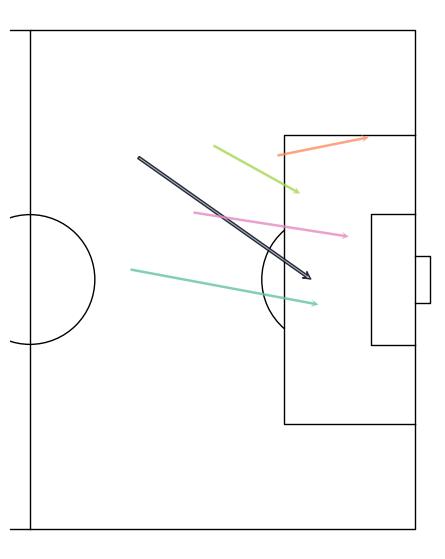

In [22]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Initialize pitch and figure outside the loop for a single plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type='box',
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1,
              half=True)

pitch.draw(ax)

# Create color set
name = "Set2"
cmap = get_cmap(name)
colors = cmap.colors
counter = 0

# Loop through all possessions and plot runs on the same pitch
for possession_id, df_runs in gundo_runs.groupby('possession_id'):
    # Plot each run in the possession
    for idx, row in df_runs.iterrows():
        pitch.arrows(row['start_x'], row['start_y'],
                     row['end_x'], row['end_y'],
                     width=1.8,
                     headwidth=3, headlength=3, headaxislength=2,
                     color=colors[counter],
                     edgecolor="k" if row['Target'] else colors[counter],  # Differentiate target and off target runs
                     linewidth=1 if row['Target'] else 0,  # Differentiate target and off target runs
                     alpha=0.8,
                     zorder=3,
                     label=row['player'] if counter == 0 else "",  # Add label only once to avoid duplicate labels
                     ax=ax)
        counter += 1
        if counter >= len(colors):
            counter = 0

# Add a title for the entire plot
team_name = gundo_runs.iloc[0]['team_name']

# Add legend (showing only one label per player to avoid duplication)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Show the plot
plt.show()


/var/folders/n3/4qctfjhd43j9h6fypc3p1h480000gn/T/ipykernel_87453/1696110020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gundo_runs['angle'] = np.arctan2(gundo_runs['end_y'] - gundo_runs['start_y'],


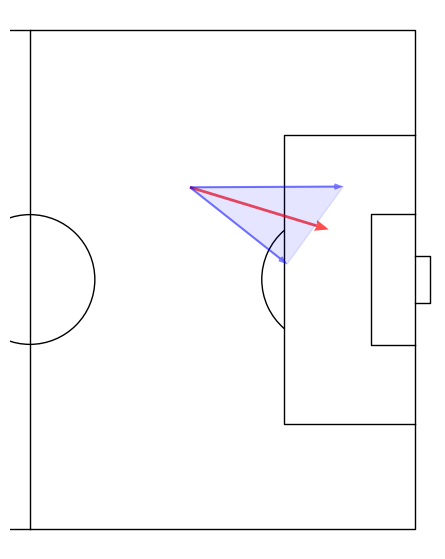

In [25]:
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Sample calculation for angle
gundo_runs['angle'] = np.arctan2(gundo_runs['end_y'] - gundo_runs['start_y'],
                                 gundo_runs['end_x'] - gundo_runs['start_x'])

# Calculate variations
distance_variation = gundo_runs['Distance'].std()
angle_variation = gundo_runs['angle'].std()
speed_variation = gundo_runs['avg_speed'].std()

# Calculate mean coordinates and mean angle
mean_start_x = gundo_runs['start_x'].mean()
mean_start_y = gundo_runs['start_y'].mean()
mean_end_x = gundo_runs['end_x'].mean()
mean_end_y = gundo_runs['end_y'].mean()
mean_angle = np.arctan2(mean_end_y - mean_start_y, mean_end_x - mean_start_x)

# Calculate adjusted end points for angle variation (cone representation)
length = np.sqrt((mean_end_x - mean_start_x) ** 2 + (mean_end_y - mean_start_y) ** 2)
angle_plus = mean_angle + angle_variation
angle_minus = mean_angle - angle_variation

end_x_plus = mean_start_x + length * np.cos(angle_plus)
end_y_plus = mean_start_y + length * np.sin(angle_plus)
end_x_minus = mean_start_x + length * np.cos(angle_minus)
end_y_minus = mean_start_y + length * np.sin(angle_minus)

# Plotting the pitch
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type='box',
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1,
              half=True)
pitch.draw(ax)

# Plot the mean arrow for runs
pitch.arrows(mean_start_x, mean_start_y, mean_end_x, mean_end_y,
             color="red", ax=ax, width=2, headwidth=4, headlength=5, alpha=0.7)

# Plot arrows showing the angle variation
pitch.arrows(mean_start_x, mean_start_y, end_x_plus, end_y_plus,
             color="blue", ax=ax, width=1.5, headwidth=3, headlength=4, alpha=0.5)
pitch.arrows(mean_start_x, mean_start_y, end_x_minus, end_y_minus,
             color="blue", ax=ax, width=1.5, headwidth=3, headlength=4, alpha=0.5)

# Shade the area between the blue arrows
ax.fill([mean_start_x, end_x_plus, end_x_minus],
        [mean_start_y, end_y_plus, end_y_minus],
        color='blue', alpha=0.1)

# Show the plot
plt.show()


In [27]:
print(distance_variation, angle_variation, speed_variation)

7.2372736926176335 0.44618075386967815 0.055042529358623554
